# Spatial visualization

We will introduce the geopandas module in Python. GeoPandas is the extension of Pandas into spatial analysis. As you will see GeoPandas could achieve most of the things the ArcGIS could do. The strength of Geopandas is its computational efficiency, while its weakness is its lack of interactive interface as in ArcGIS. However, the interactive interface in ArcGIS consumes a lot of computational resource, which renders GeoPandas an efficient spatial processing tool in Python.

- Loading data
- Visualizing spatial data
- Shapefiles: https://drive.google.com/drive/folders/1NBp4GMPOLR1k_jBz1kW1MYXp5vJc298V?usp=sharing. Please download the WHOLE FOLDER (tl_2020_12_tract) and put it under your data folder.
- Where to download the shapefiles? Shenhao's preference: https://www2.census.gov/geo/tiger/TIGER2022/
- How to find the state FIPS? Here is the link: https://www.mercercountypa.gov/dps/state_fips_code_listing.htm




In [ ]:
# Install packages
!pip install geopandas
# !pip install pysal

In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import geopandas for spatial analysis
import geopandas as gpd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
# read the data and shapefile
df = pd.read_csv('SampleDataset/Florida_ct.csv', index_col = 0)
florida_shapefile = gpd.read_file('SampleDataset/tl_2020_12_tract/tl_2020_12_tract.shp') # read the shapefile

In [5]:
# view the dataframe
df.head()

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930


In [6]:
# view the shapefile
florida_shapefile.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994..."
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193..."
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,+26.0230637,-080.4006685,"POLYGON ((-80.40957 26.03541, -80.40878 26.035..."
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,+26.2129463,-080.2358809,"POLYGON ((-80.24061 26.22083, -80.24056 26.220..."


In [7]:
# shape of the two files.
print(df.shape)
print(florida_shapefile.shape)

(4167, 88)
(5160, 13)


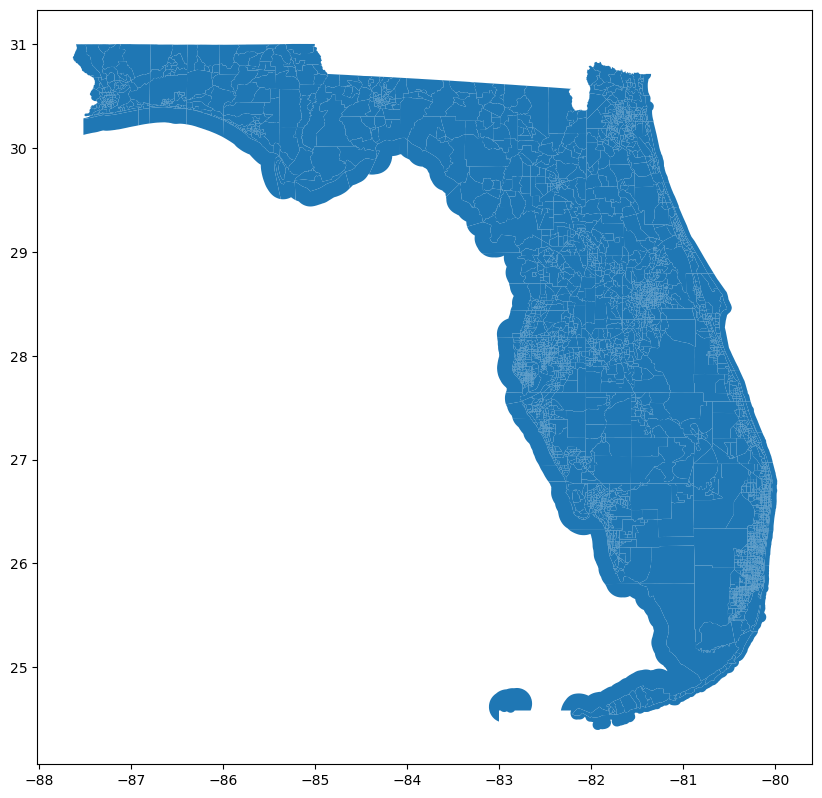

In [8]:
# quick view of the shapefile.
florida_shapefile.plot(figsize = (10,10))
plt.show()

## **Exercise.** Download the shapefile of census tracts for MA from the Census website. Then put it in your data folder. Visualize the shapefile.


## Preprocessing the data

In [9]:
# adjust the object types to facilitate the merge
florida_shapefile['GEOID'] = florida_shapefile.GEOID.astype('int64')

In [10]:
# combine the dataframe with the shapefile.
# Note that it is important to choose how - e.g., inner, right, left, etc. Here I choose 'left' for teaching purposes.
df_shp = florida_shapefile.merge(df,
                                 how = 'left',
                                 left_on = 'GEOID',
                                 right_on = 'full_ct_fips')

In [11]:
# check the shape of the new file.
# It combines the census data set and the shapefile.
df_shp.shape
# 101 = 88 + 13

(5160, 101)

In [12]:
# With the current approach, I will fill in ZEROS into the NaN values.
# However, it is NOT necessarily the best approach.
df_shp = df_shp.fillna(0.0)

In [13]:
# View the combined data set.
df_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,...,0.000000,0.017004,0.091483,0.060147,0.013899,0.165529,0.278519,0.553838,1.937228,0.030723
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,...,0.010400,0.050442,0.253958,0.054749,0.023307,0.332014,0.233480,0.607103,1.957252,0.108844
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,...,0.015806,0.093356,0.323871,0.118865,0.013207,0.455943,0.258939,0.554582,1.674524,0.215953
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,12,015,020700,12015020700,207,Census Tract 207,G5020,S,2619776,106556,...,0.016979,0.063450,0.048280,0.014137,0.006402,0.068818,0.702392,0.240077,0.486310,0.170811
5156,12,005,001900,12005001900,19,Census Tract 19,G5020,S,3493618,2801264,...,0.000000,0.042712,0.272564,0.104603,0.002690,0.379857,0.352463,0.498792,1.173037,0.060650
5157,12,005,000600,12005000600,6,Census Tract 6,G5020,S,54190724,9090097,...,0.039185,0.095611,0.194805,0.131494,0.018669,0.344968,0.489378,0.460317,0.938235,0.643045
5158,12,005,000500,12005000500,5,Census Tract 5,G5020,S,337874718,28527612,...,0.000000,0.024557,0.108001,0.060415,0.013996,0.182412,0.331173,0.485219,1.382467,0.201167


## Spatial Visualization

GIS practice is a specific case of the general network analysis, certainly with its spcialization. In most of the cases, people use some spatial units as the unit of analysis, and census tract is one of the most common spatial units. Therefore, the GIS visulization is the same as visualizing the node features of a spatial graph.

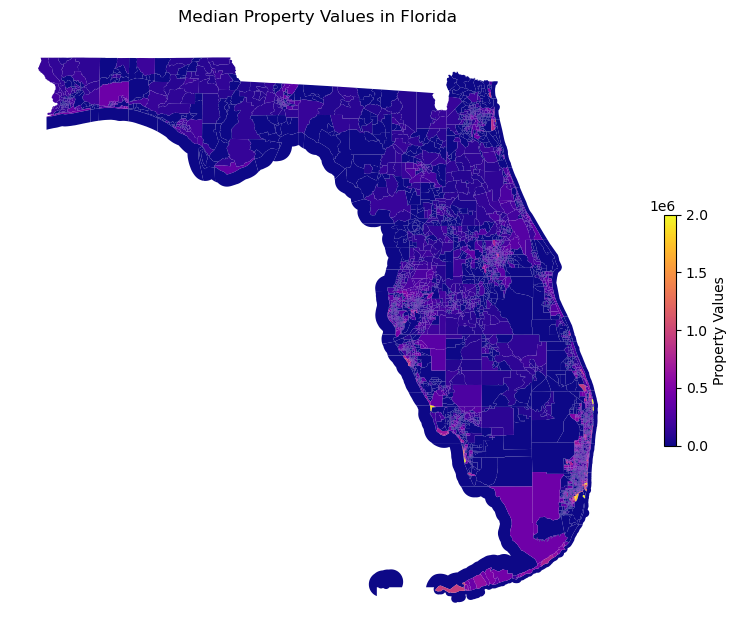

In [14]:
# example 1.0
# visualizing property values of the whole Florida
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axis
df_shp.plot(column = 'property_value_median', cmap = 'plasma', legend=True,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Florida')

plt.tight_layout()
plt.show()

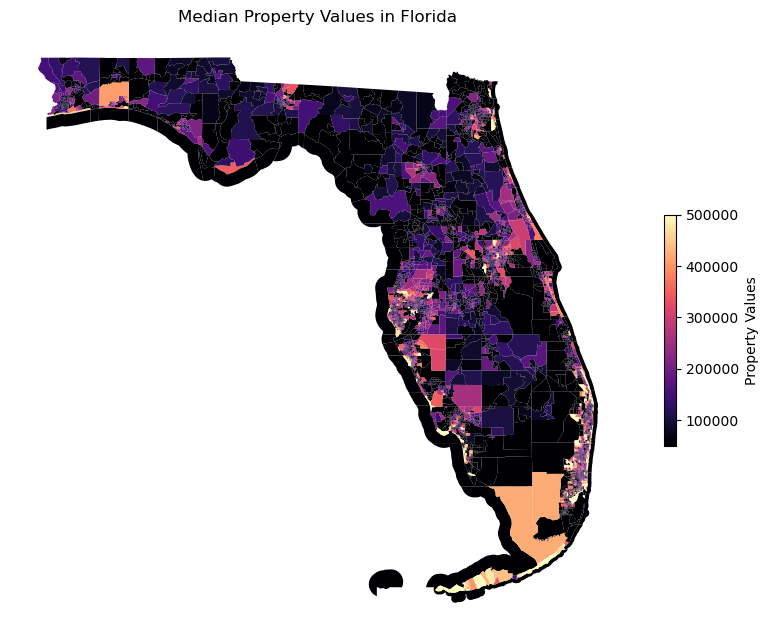

In [15]:
# example 1.1. adjusting the legend vmin and vmax to highlight the areas with high property values.
# visualizing property values of the whole Florida.

fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
df_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 50000, vmax = 500000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Florida')

plt.tight_layout()
plt.show()

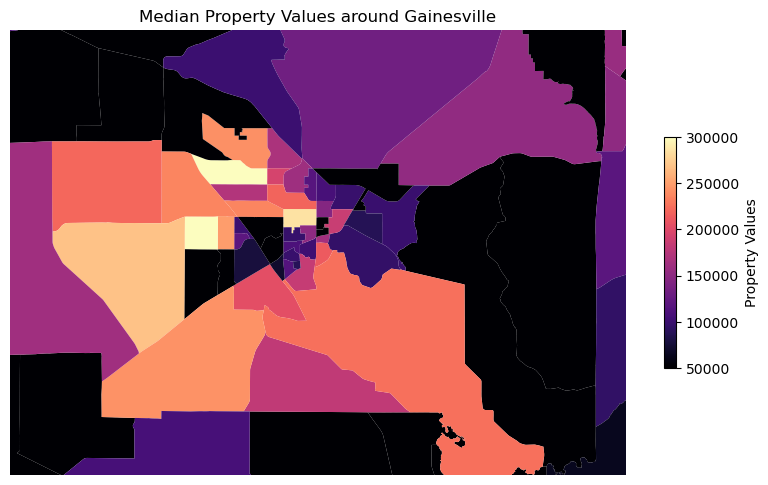

In [16]:
# example 2.1. use the Florida shapefile but adjust the longitude and latitude to show a small area.
# x is the longitude.
# y is the latitude.

x_min = -82.649702
y_max = 29.827481
x_max = -82.025303
y_min = 29.428041

fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
# df_shp.plot(facecolor="None", edgecolor='black', linewidth=0.1, ax = ax)
df_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 50000, vmax = 300000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values around Gainesville')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

## **Exercise** Visualizing household income in Florida with adjusted format. Describe what you see from the visualization.

## **Exercise** Visualizing the ratio of driving in Florida with adjusted format. Describe what you see from the visualization.